# Poems Preprocessing

In [237]:
import pandas as pd
import seaborn as sns

In [238]:
poems = pd.read_csv("../corpora/german_poems.csv")

In [239]:
poems.shape

(59401, 7)

In [240]:
poems.sample(3)

,pid,filename,poet,title,year,poem,poemlength
39632,67550,"N. N.,_UNTITLED_1885","N. N.,",UNTITLED,1885,b'In vollen Z&#252;gen &#383;aug&#8217; ich De...,319
40765,9841,"Paoli, Betty_UNTITLED_1854","Paoli, Betty",UNTITLED,1854,Wer hat je einen Freund zu Grab getragen Und n...,118
1719,51800,"Miller, Johann Martin_An Elisen_1773","Miller, Johann Martin",An Elisen,1773,Mit den Abendwolken eilet Meine Seele hin zu d...,151


## Shrink and edit corpus

### Remove poems with less than 15 tokens

In [241]:
poems = poems[poems.poemlength >= 15]

In [242]:
poems.shape

(58644, 7)

### Remove poems without a poet (N. N.)

In [243]:
poems = poems[poems["poet"] != 'N. N.,']

In [244]:
poems.shape

(58383, 7)

### Only poems of the early modern (= Frühe Moderne) according to Klaus Wieland

Demarcation: https://journals.openedition.org/rg/976#ftn10

In [245]:
poems = poems[poems.year >= 1880]

### Literary Trends classification according to Klaus Wieland

Classification: https://journals.openedition.org/rg/976#ftn10

In [246]:
literary_trends = {"Naturalismus": list(range(1880, 1892)),
                   "Jahrhundertwende" : list(range(1892, 1910)),
                   "Expressionismus": list(range(1910, 1925)),
                   "Neue Sachlichkeit": list(range(1925, 1933))}

In [247]:
def get_epoch(year):
    epoch = ""
    for k, v in literary_trends.items():
        if year in v:
            epoch = k
            break
    return epoch

In [248]:
npoems = poems.copy()
npoems["epoch_year"] = npoems.apply(lambda row: get_epoch(row.year), axis=1)

In [249]:
npoems.sample(3)

,pid,filename,poet,title,year,poem,poemlength,epoch_year
26607,46793,"Löns, Hermann_UNTITLED_1890","Löns, Hermann",UNTITLED,1890,"Hier und da, hier und da Geht ein Licht und da...",168,Naturalismus
15984,44908,"Heym, Georg_UNTITLED_1899","Heym, Georg",UNTITLED,1899,"In Maiensaaten liegen eng die Leichen, Im grün...",90,Jahrhundertwende
26426,23928,"Henckell, Karl_UNTITLED_1896","Henckell, Karl",UNTITLED,1896,Noch nicht gerastet in Erinnerungen! Die Stund...,206,Jahrhundertwende


## Text cleaning

### Replace html entities with characters

In [250]:
from html import unescape

In [251]:
npoems.sample(3)

,pid,filename,poet,title,year,poem,poemlength,epoch_year
559,41389,"Trakl, Georg_Anif_1900","Trakl, Georg",Anif,1900,"Erinnerung: Möven, gleitend über den dunklen H...",145,Jahrhundertwende
33327,45613,"Rilke, Rainer Maria_Bildnis_1900","Rilke, Rainer Maria",Bildnis,1900,Daß von dem verzichtenden Gesichte keiner ihre...,144,Jahrhundertwende
8766,10814,"Tucholsky, Kurt_Strafgericht?_1912","Tucholsky, Kurt",Strafgericht?,1912,"Sie sprachen Tage, lange, lange Tage – und kla...",155,Expressionismus


In [252]:
npoems["poem"] = npoems.poem.apply(unescape)

### Remove remaining notation of bytes " b' ... ' " inside poems

In [253]:
import re

def remove_b(s):
    regex = re.compile("b'(.*?)'")
    return re.sub(regex, r"\1", s)

In [254]:
npoems["poem"] = npoems["poem"].apply(remove_b)

In [255]:
npoems.sample(3)

,pid,filename,poet,title,year,poem,poemlength,epoch_year
9873,39784,"Ringelnatz, Joachim_Daddeldus Lied an die fest...","Ringelnatz, Joachim",Daddeldus Lied an die feste Braut,1908,"Lat man goot sin, lütte seute Marie. Mi no ssa...",285,Jahrhundertwende
46842,11154,"Tucholsky, Kurt_Nebenan_1912","Tucholsky, Kurt",Nebenan,1912,Es raschelt so im Nebenzimmer im zweiten Stock...,313,Expressionismus
4173,10214,"Weissmann, Maria Luise_UNTITLED_1914","Weissmann, Maria Luise",UNTITLED,1914,"Schweig, mein Geliebter; Mund auf Mund Wurden ...",75,Expressionismus


## Orthography correction

In [256]:
orthography_correction = {"ſ": "s", "uͤ": "ue", "aͤ": "ae", "oͤ": "oe"}

In [257]:
nnpoems = npoems.copy()
for k, v in orthography_correction.items():
    nnpoems["poem"] = nnpoems["poem"].str.replace(k, v)

## Save csv with current date

In [258]:
import datetime as dt

today = dt.datetime.today().strftime('(%d_%m_%y)')  
today = ""
output_file = '../corpora/german_modern_poems{}.csv'.format(today)
nnpoems.to_csv(output_file, index=False)

### Plot year distribution and poem count for the year 1892

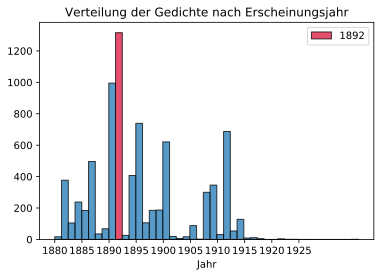

In [264]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
ax = sns.distplot(modernpoems.year,
                        kde=False, 
                        rug=False, 
                        bins=45, 
                        hist_kws=dict(edgecolor="black", linewidth=1, alpha=0.75),
                        axlabel="Jahr")
ax.set_xticks(list(range(1880, 1930, 5)))
highest = sorted([p.get_height() for p in ax.patches])[-1]
for p in ax.patches:
    if p.get_height() >= highest:
        p.set_color("crimson")
        p.set_edgecolor("black")
        p.set_label("1892")
ax.set_label("Erscheinungsjahre")
plt.title("Verteilung der Gedichte nach Erscheinungsjahr")
plt.legend()
plt.savefig("../utils/img/publicationyear_distribution.png", dpi=300)
plt.show()

In [265]:
peak = modernpoems[modernpoems.year == 1892]

In [266]:
peak_df = pd.DataFrame(peak.poet.value_counts()).rename_axis("Dichter").reset_index()
peak_df.columns = ["Dichter", "Gedichtsanzahl"]

In [267]:
peak_df

,Dichter,Gedichtsanzahl
0,"Dauthendey, Max",648
1,"Morgenstern, Christian",499
2,"Flaischlen, Cäsar",134
3,"George, Stefan",20
4,"Hofmannsthal, Hugo von",13
5,"Dahn, Felix",1
6,"Hartleben, Otto Erich",1


In [8]:
from collections import defaultdict
from datetime import datetime
import glob
import io
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from typing import Dict, List, Optional, Tuple, Union
from utils import *

In [9]:
print(df_to_latex(peak_df))

NameError: name 'peak_df' is not defined

## different epoch classification

according to: NDB und Wieland

In [305]:
import pandas as pd

In [306]:
modernpoems = pd.read_csv("../corpora/german_modern_poems.csv")

In [307]:
modernpoems.sample(5)

,pid,filename,poet,title,year,poem,poemlength,epoch_year
1012,50081,"Morgenstern, Christian_UNTITLED_1892","Morgenstern, Christian",UNTITLED,1892,"Zäzilie soll die Fenster putzen, sich selbst z...",127,Jahrhundertwende
4067,50047,"Morgenstern, Christian_Geiss und Schleiche_1892","Morgenstern, Christian",Geiss und Schleiche,1892,"Die Schleiche singt ihr Nachtgebet, die Waldge...",51,Jahrhundertwende
3551,12549,"Wedekind, Frank_Eifersucht_1891","Wedekind, Frank",Eifersucht,1891,Und wieder seh ich neu entfacht Die düstre Glu...,87,Naturalismus
686,36026,"Bierbaum, Otto Julius_Pandora_1887","Bierbaum, Otto Julius",Pandora,1887,"Als ich heute früh im schönen Parke, Der voll ...",961,Naturalismus
1908,20036,"Müller-Jahnke, Clara_Das Ende_1882","Müller-Jahnke, Clara",Das Ende,1882,"Und also war's zum letztenmal, daß unsre Hände...",98,Naturalismus


In [348]:
#modernpoems.poet.value_counts()

In [309]:
realismus = ["Meyer, Conrad Ferdinand", "Fontane, Theodor", 
             "Keller, Gottfried", "Heyse, Paul", "Storm, Theodor"]
naturalismus = ["Holz, Arno",
               "Löns, Hermann",
               "Henckell, Karl",
               "Müller-Jahnke, Clara",
               "Hartleben, Otto Erich",
               "Flaischlen, Cäsar",
               "Wedekind, Frank",
               "Wille, Bruno",
               "Liliencron, Detlev von",
               "Lachmann, Hedwig",
               "Scheerbart, Paul",
               "Dahn, Felix"]
jahrhundertwende = ["Dauthendey, Max", 
                    "Morgenstern, Christian", 
                    "Bierbaum, Otto Julius",
                    "Rilke, Rainer Maria",
                    "Dehmel, Richard Fedor Leopold",
                    "Ringelnatz, Joachim",
                    "Thoma, Ludwig",
                    "Falke, Gustav",
                    "Hofmannsthal, Hugo von",
                    "George, Stefan",
                    "Lautensack, Heinrich",
                    "Nietzsche, Friedrich"]
expressionismus = ["Klabund", 
                 "Stadler, Ernst", 
                 "Heym, Georg", 
                 "Lichtenstein, Alfred",
                 "Weissmann, Maria Luise",
                 "Engelke, Gerrit",
                 "Sack, Gustav",
                 "Stramm, August",
                 "Däubler, Theodor",
                 "Ball, Hugo",
                 "Rubiner, Ludwig",
                 "Hoddis, Jakob van",
                 "Zech, Paul",
                 "Boldt, Paul", 
                 "Lasker-Schüler, Else",
                 "Lersch, Heinrich",
                 "Mühsam, Erich", 
                "Wolfenstein, Alfred",
                  "Trakl, Georg"]
neue_sachlichkeit = ["Tucholsky, Kurt", "Loerke, Oskar"]
andere = ["Menzel, Herybert", "Lenz, Jakob Michael Reinhold"]

new_literary_trends = {"Realismus": realismus,
                       "Naturalismus": naturalismus,
                       "Jahrhundertwende": jahrhundertwende,
                       "Expressionismus": expressionismus,
                       "Neue Sachlichkeit": neue_sachlichkeit,
                       "Andere": andere}

In [310]:
def get_epoch_poet(poet):
    epoch = ""
    for k, v in new_literary_trends.items():
        if poet in v:
            epoch = k
            break
    return epoch

In [311]:
modernpoems["epoch_poet"] = modernpoems.apply(lambda row: get_epoch_poet(row.poet), axis=1)

In [314]:
modernpoems.sample(1)

,pid,filename,poet,title,year,poem,poemlength,epoch_year,epoch_poet
2787,11934,"Falke, Gustav_UNTITLED_1884","Falke, Gustav",UNTITLED,1884,"Rechts die Fabrik mit ragendem Schlot, Und der...",755,Naturalismus,Jahrhundertwende


### Remove Neue Sachlichkeit, Realismus and other epochs

In [349]:
modernpoems = modernpoems[(modernpoems.epoch_poet != "Realismus") & (modernpoems.epoch_poet != "Neue Sachlichkeit") & (modernpoems.epoch_poet != "Andere")]
#

In [350]:
# check if epochs were assigned differently
a = np.where(modernpoems.epoch_poet == modernpoems.epoch_year)
b = np.where(modernpoems.epoch_poet != modernpoems.epoch_year)

In [355]:
import datetime as dt

today = dt.datetime.today().strftime('(%d_%m_%y)')  
today = ""
output_file = '../corpora/german_modern_poems{}.csv'.format(today)
modernpoems.to_csv(output_file, index=False)

## Plot distribution

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
modernpoems = pd.read_csv("../corpora/german_modern_poems.csv")
modernpoems.sample(3)

,pid,filename,poet,title,year,poem,poemlength,epoch_year,epoch_poet
3114,69066,"Holz, Arno_UNTITLED_1898","Holz, Arno",UNTITLED,1898,Am andern Morgen ist der Biela krank. Der arme...,53,Jahrhundertwende,Naturalismus
3814,16685,"Engelke, Gerrit_UNTITLED_1904","Engelke, Gerrit",UNTITLED,1904,Die Straße ist nun fast schon tot – Vorüber kl...,210,Jahrhundertwende,Expressionismus
3197,20001,"Müller-Jahnke, Clara_UNTITLED_1882","Müller-Jahnke, Clara",UNTITLED,1882,"O du sonnige, wonnige Pfingstenzeit! Der Himme...",270,Naturalismus,Naturalismus


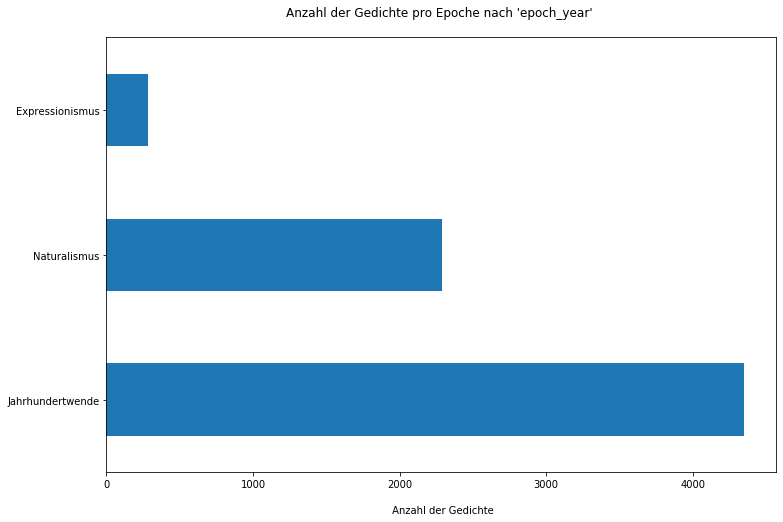

In [30]:
modernpoems.epoch_year.value_counts().plot(kind="barh",
                                      figsize=(12, 8),
                                      label="Epoche")
plt.xlabel("\n Anzahl der Gedichte")
plt.title("Anzahl der Gedichte pro Epoche nach 'epoch_year' \n")
plt.savefig("../utils/img/epoch_year_distribution.png", dpi=300)
plt.show()

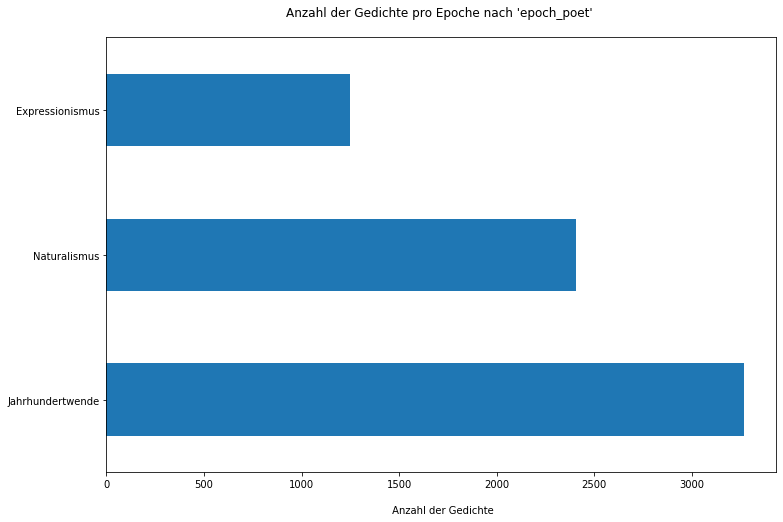

In [31]:
modernpoems.epoch_poet.value_counts().plot(kind="barh",
                                      figsize=(12, 8),
                                      label="Epoche")
plt.xlabel("\n Anzahl der Gedichte")
plt.title("Anzahl der Gedichte pro Epoche nach 'epoch_poet' \n")
plt.savefig("../utils/img/epoch_poet_distribution.png", dpi=300)
plt.show()

## Downsampling

by column `epoch_poet`

In [1]:
import pandas as pd

In [3]:
modernpoems = pd.read_csv("../corpora/german_modern_poems.csv")

In [4]:
modernpoems.sample(2)

,pid,filename,poet,title,year,poem,poemlength,epoch_year,epoch_poet
135,35922,"Bierbaum, Otto Julius_5._1887","Bierbaum, Otto Julius",5.,1887,"Ich fuhr ins fremde, weite Land; es war Ein Fl...",143,Naturalismus,Jahrhundertwende
2747,46561,"Löns, Hermann_2. Auf der Fahrt_1890","Löns, Hermann",2. Auf der Fahrt,1890,"Es kreischt und knarrt das Eisenrad, Es dampft...",191,Naturalismus,Naturalismus


In [5]:
list(modernpoems.epoch_poet.unique())

['Jahrhundertwende', 'Expressionismus', 'Naturalismus']

In [25]:
def random_downsampling(corpus, class_col = "epoch_poet", max_value = 1000):
    """ Reduces all instances of all classes to a certain maximum value.
    """   
    
    corpus_1 = corpus[corpus[class_col] == 'Expressionismus']
    corpus_2 = corpus[corpus[class_col] == 'Jahrhundertwende']
    corpus_3 = corpus[corpus[class_col] == 'Naturalismus']
    
    corpus_1 = corpus_1.sample(max_value)
    corpus_2 = corpus_2.sample(max_value)
    corpus_3 = corpus_3.sample(max_value)

    return pd.concat([corpus_1, corpus_2, corpus_3], axis=0)

In [27]:
modernpoems.epoch_year.value_counts()

Jahrhundertwende    4350
Naturalismus        2291
Expressionismus      282
Name: epoch_year, dtype: int64

In [28]:
modernpoems_epochpoet = random_downsampling(modernpoems, 
                                            class_col = "epoch_poet")
modernpoems_epochyear = random_downsampling(modernpoems, 
                                            class_col = "epoch_year", 
                                            max_value=282)

In [29]:
modernpoems_epochpoet.to_csv('../corpora/german_modern_poems_epochpoet.csv', index=False)
modernpoems_epochyear.to_csv('../corpora/german_modern_poems_epochyear.csv', index=False)

### Plot downsampled epoch distribution

#### modernpoems_epochyear

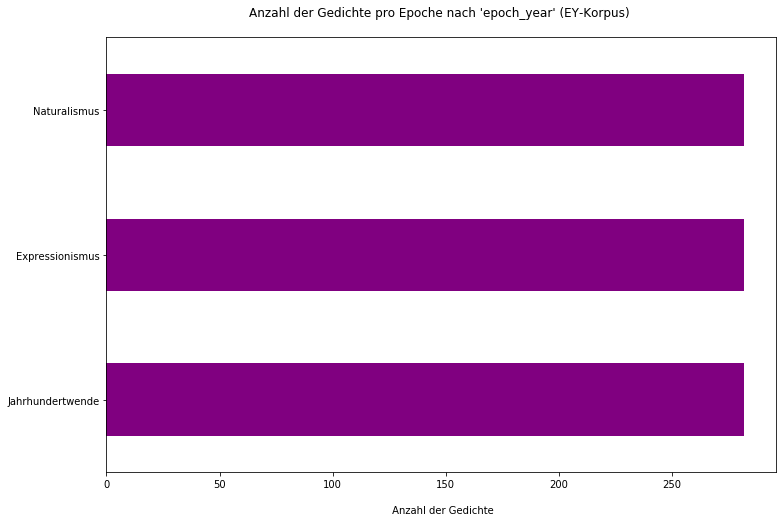

In [48]:
modernpoems_epochyear.epoch_year.value_counts().plot(kind="barh",
                                      figsize=(12, 8),
                                      label="Epoche",
                                      color="purple")
plt.xlabel("\n Anzahl der Gedichte")
plt.title("Anzahl der Gedichte pro Epoche nach 'epoch_year' (EY-Korpus) \n")
plt.savefig("../utils/img/epoch_year_distribution_eycorpus.png", dpi=300)
plt.show()

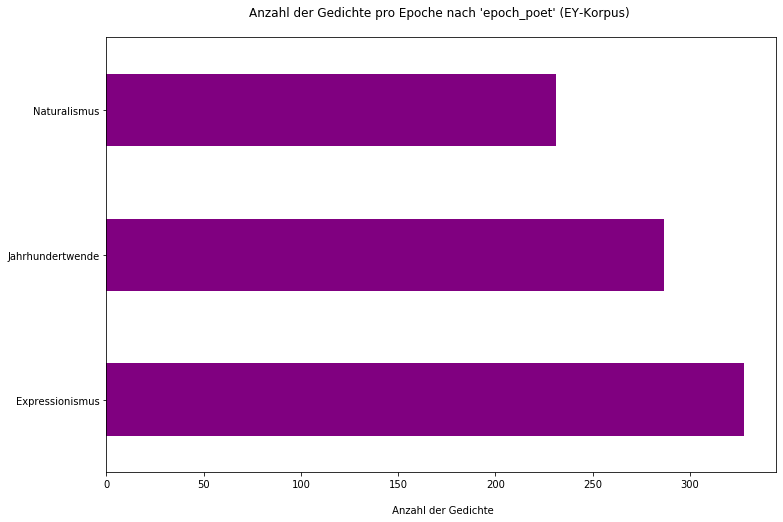

In [49]:
modernpoems_epochyear.epoch_poet.value_counts().plot(kind="barh",
                                      figsize=(12, 8),
                                      label="Epoche",
                                      color="purple")
plt.xlabel("\n Anzahl der Gedichte")
plt.title("Anzahl der Gedichte pro Epoche nach 'epoch_poet' (EY-Korpus) \n")
plt.savefig("../utils/img/epoch_poet_distribution_eycorpus.png", dpi=300)
plt.show()

#### modernpoems_epochpoet

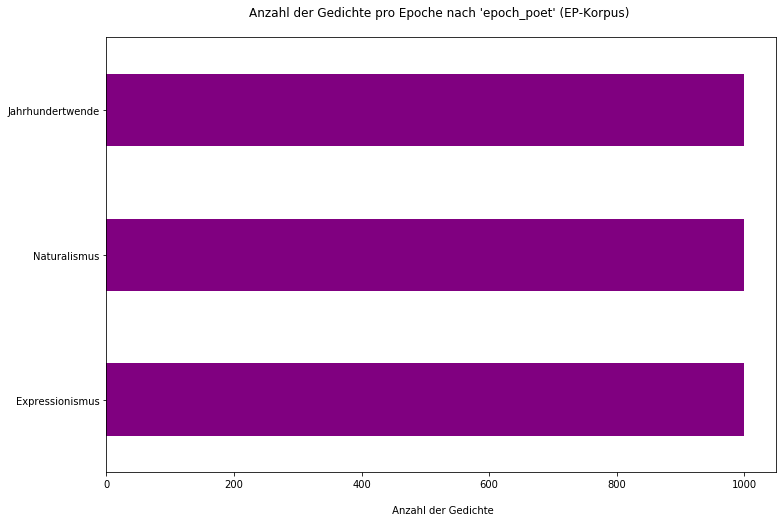

In [50]:
modernpoems_epochpoet.epoch_poet.value_counts().plot(kind="barh",
                                      figsize=(12, 8),
                                      label="Epoche",
                                      color="purple")
plt.xlabel("\n Anzahl der Gedichte")
plt.title("Anzahl der Gedichte pro Epoche nach 'epoch_poet' (EP-Korpus) \n")
plt.savefig("../utils/img/epoch_poet_distribution_epcorpus.png", dpi=300)
plt.show()

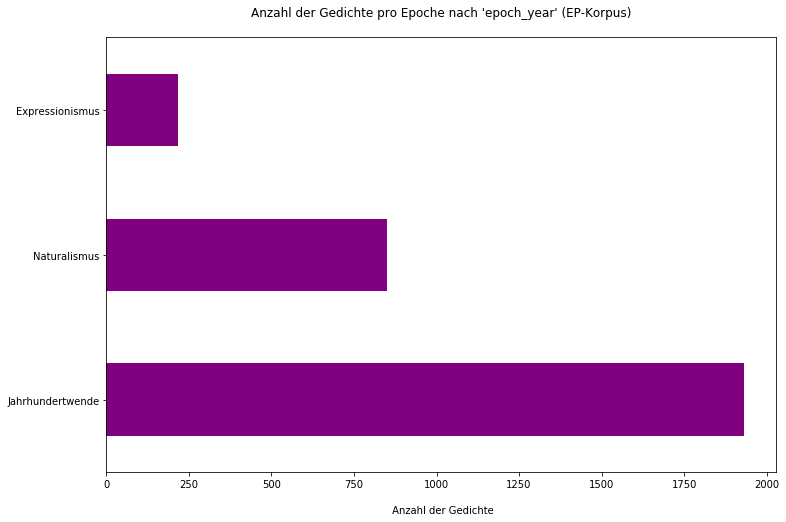

In [51]:
modernpoems_epochpoet.epoch_year.value_counts().plot(kind="barh",
                                      figsize=(12, 8),
                                      label="Epoche",
                                      color="purple")
plt.xlabel("\n Anzahl der Gedichte")
plt.title("Anzahl der Gedichte pro Epoche nach 'epoch_year' (EP-Korpus)\n")
plt.savefig("../utils/img/epoch_year_distribution_epcorpus.png", dpi=300)
plt.show()